## AutoEncoder Model

In [9]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [10]:
tf.__version__

'2.8.0'

In [11]:
from tensorflow.keras.datasets import mnist

In [15]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [16]:
X_train.shape

(60000, 28, 28)

In [17]:
X_test.shape

(10000, 28, 28)

In [18]:
X_train = X_train/255
X_test = X_test/255

In [21]:
X_train = X_train.reshape((X_train.shape[0], 784))
X_test = X_test.reshape((X_test.shape[0], 784))
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [23]:
from tensorflow.keras.models import Model

In [24]:
from tensorflow.keras.layers import Dense, Input

In [25]:
# Define the Input Layer
input_layer = Input(shape=(784,))

In [26]:
# Create Encoding Layers and then connect the input layer
# Here we create the Dense layer which is similar to a function. 
encoder_layer = Dense(64, activation='relu')(input_layer)

In [27]:
# Create the decoder layer and then connect the encoder layer. 
# Here we are using the activation as sigmoid because we want to make the decision if the pixel is same or not. 
decoder_layer = Dense(784, activation='sigmoid')(encoder_layer)

In [28]:
# Create the AutoEncoder Model
autoencoder = Model(input_layer, decoder_layer)

In [29]:
# Build the encoder model that starts with input layer and finishes with encoder layer
encoder_model = Model(input_layer, encoder_layer)

In [33]:
# 64 neuron input layer for the Decoder
encoded_input = Input(shape=(64,))

# Retreive the last layer of the autoencoder model
decoded_layer = autoencoder.layers[-1]

# Create the decoder_model
decoder = Model(encoded_input, decoded_layer(encoded_input))

In [36]:
autoencoder.compile(optimizer='adam', 
                    loss='binary_crossentropy') 

In [38]:
autoencoder.fit(X_train, X_train, 
                epochs=20, 
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1371 - val_loss: 0.0908
Epoch 2/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0837 - val_loss: 0.0780
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0773 - val_loss: 0.0751
Epoch 4/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0755 - val_loss: 0.0742
Epoch 5/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0747 - val_loss: 0.0737
Epoch 6/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0744 - val_loss: 0.0735
Epoch 7/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0741 - val_loss: 0.0733
Epoch 8/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0740 - val_loss: 0.0732
Epoch 9/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0738 - val_loss: 0.0732
Epoch 10/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.073

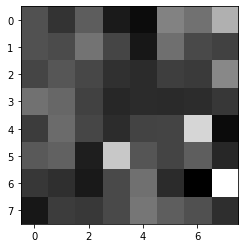

In [39]:
encoded_imgs = encoder_model.predict(X_test)
import matplotlib.pyplot as plt
plt.imshow(encoded_imgs[0].reshape(8,8), cmap='gray')

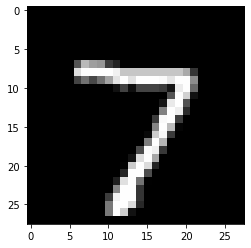

In [40]:
plt.imshow(X_test[0].reshape(28,28), cmap='gray')

In [41]:
y_test[0]

7

In [43]:
## The first image shows the encoded model.  The second image shows 7.  
## But the first image is the encoded representation of the second image. 

In [44]:
decoded_imgs = decoder.predict(encoded_imgs)

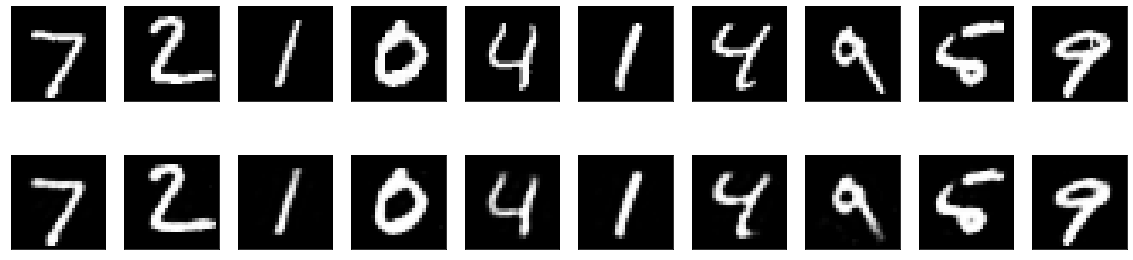

In [45]:
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 5))
for i in range(n):
    # Original Images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed Layers
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [46]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 784)               50960     
                                                                 
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


In [47]:
encoder_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
Total params: 50,240
Trainable params: 50,240
Non-trainable params: 0
_________________________________________________________________


In [48]:
decoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 64)]              0         
                                                                 
 dense_1 (Dense)             (None, 784)               50960     
                                                                 
Total params: 50,960
Trainable params: 50,960
Non-trainable params: 0
_________________________________________________________________
